
# Project 1 - Airbnb in Rio de Janeiro


#### a - Business Understading  
The Brazilian tourism is a promising market for a disruptive player as Airbnb, no wonder this startup is becaming famous in Rio de Janeiro. Aligned to that I´ll answer the following questions in order to show how Airbnb is positioned in Rio's tourism industry.  

##### Main questions:
1- Is Airbnb growing in Rio de Janeiro?   
2- How events as New Year's Eve and Carnival affect Airbnb's activities?   
3- What are the most popular neighborhood?   
4- Do the average price depend on both neighborhood and property type? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### b - Data Understading  
To respond the questions above some data are requered, for example:  
(a) - A list of review per date (some coluns of reviews_2020-04-20.csv file)  
(b) - A list of price offered per month (intire listing_price_2019.csv file)  

In [2]:
#(a) - the list of review per date
reviews_usecols_list = ['listing_id', 'date']
df_reviews20 = pd.read_csv('reviews_2020-04-20.csv', usecols = reviews_usecols_list)

#(b) - A list of price offered per month
df_listings19_price = pd.read_csv('listing_price_2019.csv')

#### c - Data Preparation | Modelling | Evaluate
To two frist questions, the DataFrame supports the graphical analysis is df_plot1 and the other question will be supported by df_analysis. Thus, this topic is followed by two sections:

**1st section:** Creating df_plot1 using data from reviews_2020-04-20.csv file

**2nd section:** Creating df_analysis using data merging all datasets

In [3]:
# Are there missing values or Nan in reviews dataset?
for column in df_reviews20.columns:
    print(df_reviews20[df_reviews20[column].isna()][column].shape[0], 'Nan found in column', column)

0 Nan found in column listing_id
0 Nan found in column date


In [4]:
#1st section - Creating df_plot1 using data from reviews_2020-04-20.csv file
# Treatment of reviews 2020 dataset
df_reviews20['date'] = pd.to_datetime(df_reviews20['date'])                                
df_reviews20['month'] = df_reviews20['date'].dt.month
df_reviews20['year'] = df_reviews20['date'].dt.year
df_reviews20['week'] = df_reviews20['date'].dt.week

# Defining plot dataframe from the reviews 2020 dataset treated
df_plot1 = df_reviews20.groupby(['year', 'week']).date.count().unstack(0)

# In this case, NaN means there were no reviews. Thus, NaN will be changed by 0
df_plot1.fillna(0, inplace = True)
df_plot1.head()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
week,,,,,,,,,,,
1,0.0,2.0,42.0,163.0,315.0,466.0,1005.0,1886.0,3300.0,4899.0,5830.0
2,0.0,0.0,22.0,73.0,170.0,416.0,637.0,1084.0,1462.0,2111.0,3577.0
3,0.0,2.0,22.0,72.0,131.0,288.0,585.0,1031.0,1405.0,2094.0,3588.0
4,0.0,4.0,20.0,76.0,151.0,273.0,658.0,1019.0,1486.0,2193.0,3323.0
5,0.0,1.0,24.0,71.0,112.0,296.0,573.0,981.0,1381.0,2136.0,3312.0


## Question 1- Is Airbnb growing in Rio de Janeiro?

[(0, 120000), (1, 52)]

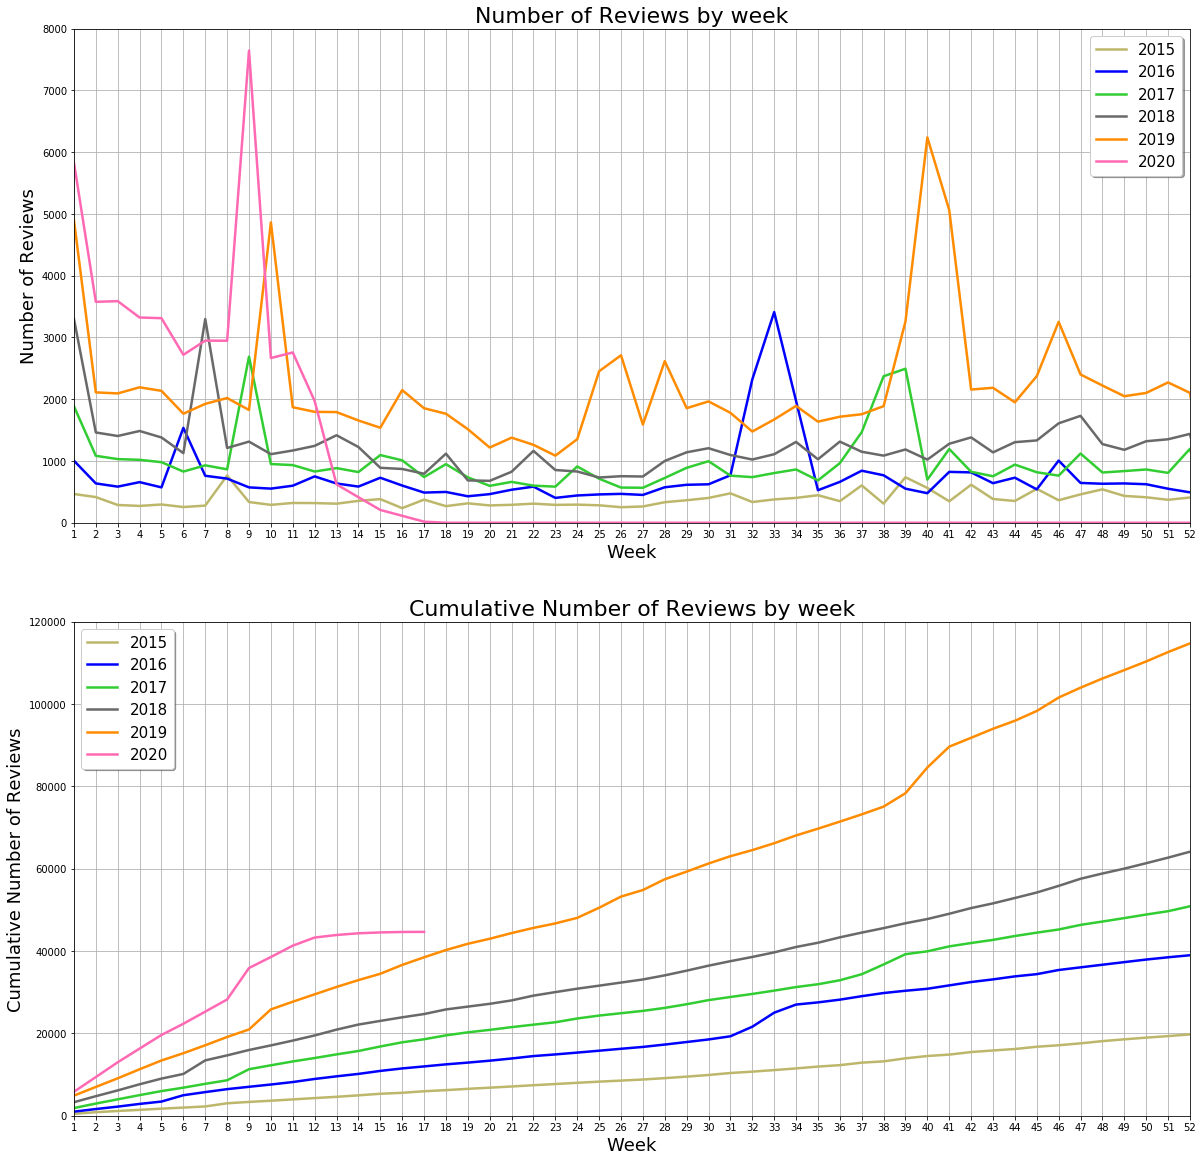

In [5]:
# First Plot Section
fig, chart1 =  plt.subplots(2, 1)

color_dictionary = {1:'darkkhaki', 2:'blue', 3:'limegreen', 4:'dimgray', 5:'darkorange', 
                    6:'hotpink', 7:'black', 8:'violet', 9:'darkgoldenrod', 10:'yellow'}

count = 1
rate_number_reviews = []

for year in df_plot1.loc[:, 2015:].columns: # This study will envolve just years from 2015 to 2020
    
    #Plot 1
    x = df_plot1[year].index
    y0 = df_plot1[year]
    chart1[0].plot(x, y0, color = color_dictionary[count], linestyle='-', linewidth=2.5,  label = year)
    
    #Plot 2
    x1 = []
    cumulative_sum_reviews = []
    transparency = 0.3
    for week in df_plot1[year].index:
        if df_plot1.loc[week:week, year].sum() == 0: break
        cumulative_sum_reviews.append(df_plot1.loc[1:week, year].sum())
        x1.append(week)
        y1 = cumulative_sum_reviews      
    chart1[1].plot(x1, y1, color = color_dictionary[count], linestyle='-', linewidth=2.5,  label = year)
    transparency += 0.2
    count += 1

# Settings of figure
fig.set_size_inches(20, 20)

chart1[0].legend(shadow = True, fontsize = 15)
chart1[1].legend(shadow = True, fontsize = 15)

chart1[0].set_xlabel('Week', fontsize = 18)
chart1[1].set_xlabel('Week', fontsize = 18)

chart1[0].set_ylabel('Number of Reviews', fontsize = 18)
chart1[1].set_ylabel('Cumulative Number of Reviews', fontsize = 18)

chart1[0].set_title('Number of Reviews by week', fontsize = 22)
chart1[1].set_title('Cumulative Number of Reviews by week', fontsize = 22)

chart1[0].grid()
chart1[1].grid()

chart1[0].set_xticks(list(df_plot1.index))
chart1[1].set_xticks(list(df_plot1.index))

chart1[0].set(xlim = [1, 52], ylim=[0, 8000])
chart1[1].set(xlim = [1, 52], ylim=[0, 120000])

### Answer 1 
Yes! Both charts allow us to see the Airbnb's growth in Rio the Janeiro city. In the first one, it is clear that the curve of reviews per week moves up year by year. Complementarily, the second chart show how the slope of curve is increasing every following year

### Question 2 - How events as New Year's Eve and Carnival affect Airbnb's activities?

In [6]:
# Creating dataframe of deviation of each main event occured in Rio de Janeiro 

events_list = ["New Year's Eve", 'Carnival', 'Rock In Rio', 'Olympics Games', 'America Cup']

date_list = [
    [(2015,1),  (2016,1) ,  (2017,1), (2018,1),  (2019,1), (2020,1)], 
    [(2015,8),  (2016,6) ,  (2017,9), (2018,7), (2019,10), (2020,9)],
    [(2015,0),  (2016,0) , (2017,39), (2018,0), (2019,40), (2020,0)],
    [(2015,0), (2016,33) ,  (2017,0), (2018,0),  (2019,0), (2020,0)],
    [(2015,0), (2016,0) ,  (2017,0), (2018,0), (2019,26), (2020,0)] 
] #(year, month) and zero represent that the event did not occur

def percentual_deviation (dates, events, df):
    '''
    This function will compare the reviews of each week peak to the average of reviews in the whole year 
    and return a dataframe with the results.
    
    Args: 
    - dates: a list of tuples containing the date of each events. 
           Tuples formating standard: (year, week) ,integer ,  
           p.s: use 0 to represent that the event did not occur in the respective year
    - events: list of strings of all main events occured
    - df: dataframe that contains the number of reviews for each peak
    
    Return: 
    - df_new: dataframe containing the calculated deviation of each event
    '''   
    
    deviation_percentual_list = [[],[],[],[],[]]
    year_list = []
    
    for i in range(len(dates)):
        
        for year, week in date_list[i]:
            if year not in year_list: year_list.append(year)
            if week != 0:
                value = df[year][week]
                average = df[year].mean()
                deviation = format((value - average) /average, '.2%') 
                deviation_percentual_list[i].append(deviation)
            else:
                deviation_percentual_list[i].append(np.nan)
                
    df_new = pd.DataFrame(data = deviation_percentual_list, columns = year_list, index = events).fillna('-')
    return df_new

percentual_deviation(date_list, events_list, df_plot1)            

,2015,2016,2017,2018,2019,2020
New Year's Eve,23.26%,34.33%,96.47%,172.74%,126.36%,591.89%
Carnival,102.35%,105.45%,180.22%,172.57%,124.70%,807.17%
Rock In Rio,-,-,159.81%,-,188.23%,-
Olympics Games,-,355.94%,-,-,-,-
America Cup,-,-,-,-,25.26%,-


### Answer 2 
Comparing the reviews of each week spike to the average of reviews in the whole year. That way it’s possible to measure the impact of such big events on the Airbnb activity. According to the table below, Olympics Games had the highest impact with an increase of 355,94% and the America Cup of Football had the lowest one with 22,90% of increase.

In [8]:
# Data Preparation - 2nd section: Creating df_analysis using data merging all datasets

# Preparing the dataset for analysis
df_reviews19 = df_reviews20[df_reviews20['year'] == 2019] # I'll just study datas from last year (2019)

# Creating Dataframe that will be analyzed: df_analysis19
df_analysis19 = pd.merge(df_reviews19, df_listings19_price, on = 'listing_id', how = 'left')
df_analysis19.head()


,listing_id,date,month,year,week,neighbourhood_cleansed,property_type,accommodates,price
0,17878,2019-01-05,1,2019,1,Copacabana,Condominium,5.0,311.416667
1,17878,2019-01-18,1,2019,3,Copacabana,Condominium,5.0,311.416667
2,17878,2019-01-29,1,2019,5,Copacabana,Condominium,5.0,311.416667
3,17878,2019-02-22,2,2019,8,Copacabana,Condominium,5.0,311.416667
4,17878,2019-03-05,3,2019,10,Copacabana,Condominium,5.0,311.416667


In [9]:
# Are there missing values or Nan in reviews dataset?
for column in df_analysis19.columns:
    print(df_analysis19[df_analysis19[column].isna()][column].shape[0], 'Nan found in column', column)

df_analysis19[df_analysis19['neighbourhood_cleansed'].isna()].head()

0 Nan found in column listing_id
0 Nan found in column date
0 Nan found in column month
0 Nan found in column year
0 Nan found in column week
171 Nan found in column neighbourhood_cleansed
171 Nan found in column property_type
171 Nan found in column accommodates
171 Nan found in column price


,listing_id,date,month,year,week,neighbourhood_cleansed,property_type,accommodates,price
7159,1130596,2019-01-13,1,2019,2,NaN,NaN,NaN,NaN
7160,1130596,2019-01-23,1,2019,4,NaN,NaN,NaN,NaN
7161,1130596,2019-02-13,2,2019,7,NaN,NaN,NaN,NaN
7162,1130596,2019-03-01,3,2019,9,NaN,NaN,NaN,NaN
7163,1130596,2019-03-06,3,2019,10,NaN,NaN,NaN,NaN


In [10]:
#Missing data treatment
df_analysis19.dropna(inplace = True)  
for column in df_analysis19.columns:
    print(df_analysis19[df_analysis19[column].isna()][column].shape[0], 'Nan found in column', column)

0 Nan found in column listing_id
0 Nan found in column date
0 Nan found in column month
0 Nan found in column year
0 Nan found in column week
0 Nan found in column neighbourhood_cleansed
0 Nan found in column property_type
0 Nan found in column accommodates
0 Nan found in column price


### Question 3 - What are the most popular neighborhood?

Index(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Leblon', 'Botafogo',
       'Centro', 'Jacarepaguá', 'Santa Teresa', 'Recreio dos Bandeirantes',
       'Flamengo'],
      dtype='object')


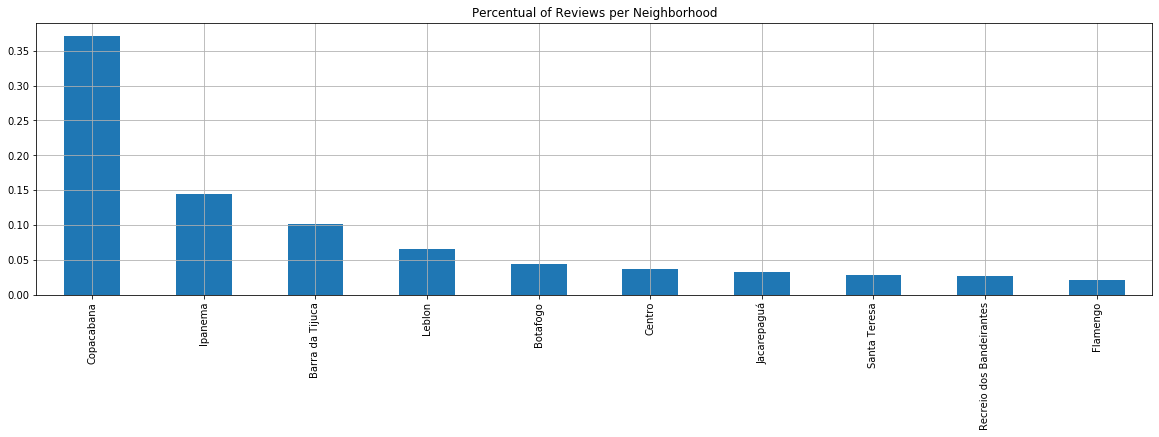

In [11]:
# What were the most popular neighborhood in 2019?
popular_ngbhood_list = df_analysis19.neighbourhood_cleansed.value_counts(normalize = True).head(10).index
df_analysis19.neighbourhood_cleansed.value_counts(normalize = True).head(10).plot.bar(figsize = (20,5), grid = True, title = "Percentual of Reviews per Neighborhood")
print(popular_ngbhood_list)

In [12]:
df_analysis19.neighbourhood_cleansed.value_counts(normalize = True).head(10)

Copacabana                  0.371286
Ipanema                     0.144572
Barra da Tijuca             0.100767
Leblon                      0.065773
Botafogo                    0.044367
Centro                      0.036406
Jacarepaguá                 0.032760
Santa Teresa                0.028668
Recreio dos Bandeirantes    0.026860
Flamengo                    0.020721
Name: neighbourhood_cleansed, dtype: float64

Index(['Apartment', 'Condominium', 'Serviced apartment', 'Loft', 'House'], dtype='object')

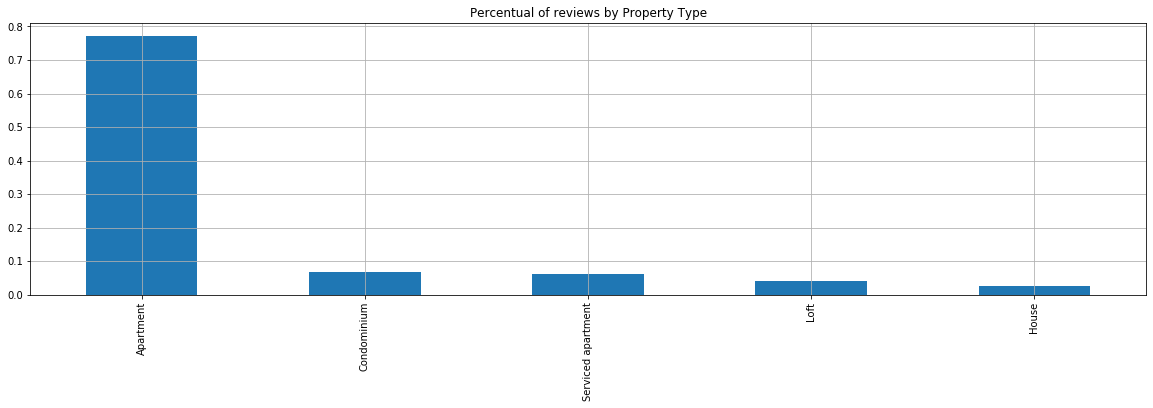

In [13]:
# What were the most wanted property type in 2019?
df_analysis19 = df_analysis19[df_analysis19.neighbourhood_cleansed.isin(popular_ngbhood_list)]
df_analysis19.property_type.value_counts(normalize = True).head().plot.bar(figsize = (20,5), grid = True, title = "Percentual of reviews by Property Type")
popular_proptype_list = df_analysis19.property_type.value_counts(normalize = True).head().index
popular_proptype_list 

In [14]:
df_analysis19.property_type.value_counts(normalize = True)

Apartment                 0.771459
Condominium               0.067424
Serviced apartment        0.062691
Loft                      0.042650
House                     0.025815
Guest suite               0.006551
Aparthotel                0.004395
Bed and breakfast         0.004263
Guesthouse                0.004114
Hostel                    0.002148
Hotel                     0.002049
Boutique hotel            0.001578
Villa                     0.001322
Townhouse                 0.001156
Chalet                    0.000760
Other                     0.000355
Cabin                     0.000273
Bungalow                  0.000231
Tiny house                0.000223
Nature lodge              0.000182
Island                    0.000140
Treehouse                 0.000066
Earth house               0.000058
Casa particular (Cuba)    0.000050
Casa particular           0.000050
Name: property_type, dtype: float64

### Answer 3 
Copacabana is the most popular neighbourhood in Rio de Janeiro getting  43,55% of 35908 reviews and the less popular is Flamengo with 2,29% of reviews. 


In [177]:
df_analysis19 = df_analysis19[df_analysis19.property_type.isin(popular_proptype_list)]
df_analysis19['price_accommodates'] = df_analysis19['price'] / df_analysis19['accommodates']
df_analysis19.head()

,listing_id,date,month,year,week,neighbourhood_cleansed,property_type,accommodates,price,price_accommodates
0,17878,2019-01-05,1,2019,1,Copacabana,Condominium,5.0,311.416667,62.283333
1,17878,2019-01-18,1,2019,3,Copacabana,Condominium,5.0,311.416667,62.283333
2,17878,2019-01-29,1,2019,5,Copacabana,Condominium,5.0,311.416667,62.283333
3,17878,2019-02-22,2,2019,8,Copacabana,Condominium,5.0,311.416667,62.283333
4,17878,2019-03-05,3,2019,10,Copacabana,Condominium,5.0,311.416667,62.283333


In [178]:
# Groupping df_analysis to plot it.
df_analysis19_grp = df_analysis19.groupby(['neighbourhood_cleansed', 'property_type']).price_accommodates.mean().unstack(1)
df_analysis19_grp['total'] = df_analysis19_grp['Apartment'] + df_analysis19_grp['Serviced apartment'] + df_analysis19_grp['Condominium'] + df_analysis19_grp['Loft'] + df_analysis19_grp['House']                                                                    

df_analysis19_grp.sort_values(by = ['total'], ascending = False, inplace= True)
df_analysis19_grp

property_type,Apartment,Condominium,House,Loft,Serviced apartment,total
neighbourhood_cleansed,,,,,,
Leblon,84.628117,125.006871,87.383897,116.548236,112.075383,525.642503
Ipanema,82.163890,91.071326,119.533590,63.143798,110.900003,466.812607
Barra da Tijuca,73.708606,62.780313,75.676274,96.730853,80.532058,389.428104
Copacabana,58.409791,64.105987,85.945427,64.265185,63.634882,336.361272
Flamengo,47.031313,66.920968,15.041667,72.721027,124.687881,326.402856
Recreio dos Bandeirantes,51.100083,60.945955,61.774429,81.808333,60.669372,316.298172
Jacarepaguá,65.393711,60.453316,53.589947,53.508333,63.399886,296.345192
Santa Teresa,50.008181,63.814967,51.453524,60.400733,66.988071,292.665475
Botafogo,55.322500,61.713939,37.407903,57.068258,54.467114,265.979714


Text(0.5, 1.0, 'Average Price per Person in 2019')

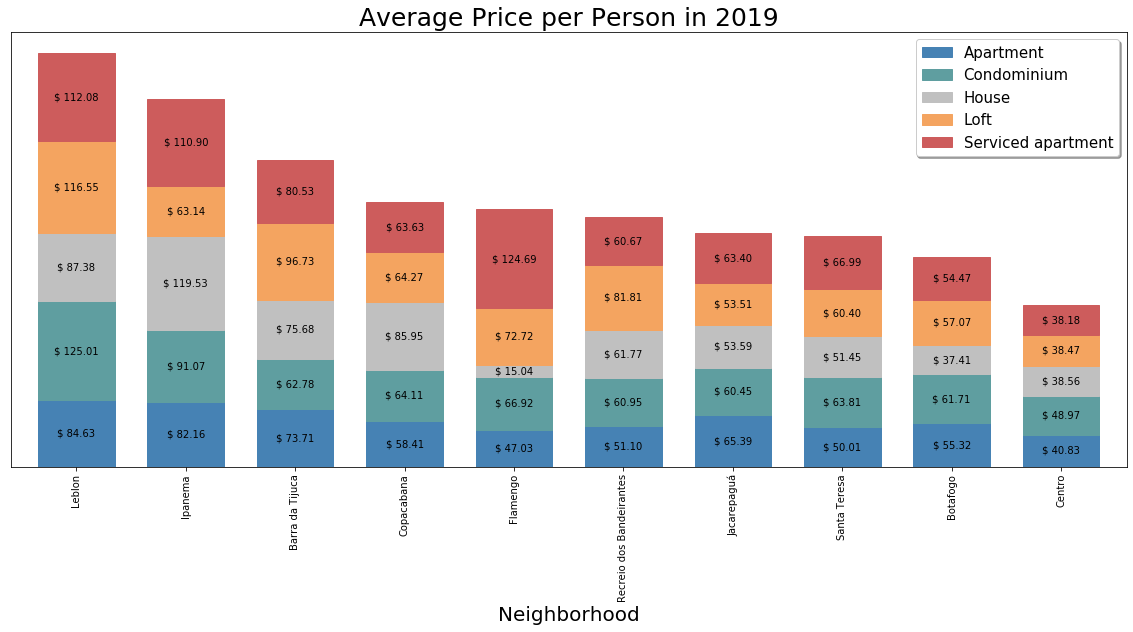

In [179]:
#Second Plotting Section

chart2 = df_analysis19_grp.loc[:, 'Apartmen':'Serviced apartment'].plot.bar(stacked=True, width = 0.7)

#Support variables
count = 1
color = 'steelblue'

#Plotting
for p in chart2.patches:
    if count > 10: color = 'cadetblue'
    if count > 20: color = 'silver'
    if count > 30: color = 'sandybrown'
    if count > 40: color = 'indianred'
    p.set_color(color)
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    chart2.text(x+width/2, y+height/2, '$ {:.2f}'.format(height), horizontalalignment='center', verticalalignment='center')
    count += 1
    
#Setting of chart    
chart2.figure.set_size_inches(20, 8)
chart2.yaxis.set_visible(False)
chart2.legend(shadow = True, fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 20)
plt.title('Average Price per Person in 2019', fontsize = 25)

### Answer 4
The chart above shows us that the average price depends on both neighbourhood and property type. A strong sign of that is service apartments in Flamengo costs significantly more than in any other neighbourhood. On the other hand, it also has the cheapest houses when compared to all similar offerings in other neighbourhoods.  